<a href="https://colab.research.google.com/github/JuanYa1901/Evaluacion_4/blob/main/620454_Base_Entrega_Modelos_NO_Supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 4 - Modelos de segmentación

**Autor(es):**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-10 01:30:14--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.1s    

2025-07-10 01:30:15 (1.50 MB/s) - ‘datos_segmentacion.csv’ saved [159876/159876]



In [ ]:
!pip install kneed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

from kneed import KneeLocator

In [ ]:
df = pd.read_csv("datos_segmentacion.csv")

df.head()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

**Variables a utilizar:**

- actividad_fisica
- nivel_descanso

Motivo:

In [ ]:
# Escriba su código acá

### Elección del número de cluster óptimo

In [ ]:
# Escriba su código acá
features = ['actividad_fisica', 'nivel_descanso']
df_simple = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_simple)

sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(X_scaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

El codo está en k = 6
El SSE = [2565.96]


### Creación y entrenamiento del modelo

In [ ]:
# Escriba su código acá
# Primera aplicación de KMeans con las características seleccionadas
kmeans_x= KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_x.fit_predict(X_scaled)
df_simple['grupo'] = grupos

# Silhouette Score en espacio seleccionado
silhouette_simple= silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio seleccionado): {silhouette_simple:.4f}")

Silhouette Score (espacio seleccionado): 0.3235


Visualizar los grupos generados mostrando los centroides de cada grupo.

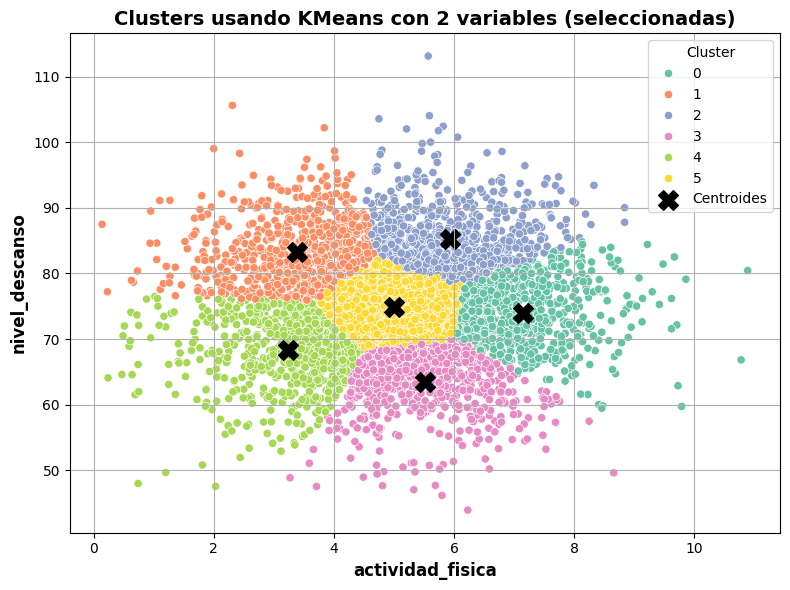

In [ ]:
# Obtiene los centroides en escala original
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)


# Gráfica de los grupos
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_simple, x='actividad_fisica', y='nivel_descanso', hue='grupo', palette='Set2')
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans con 2 variables (seleccionadas)", fontsize=14, fontweight="bold")
plt.xlabel("actividad_fisica", fontsize=12, fontweight="bold")
plt.ylabel("nivel_descanso", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluación del modelo

In [ ]:
# Escriba su código acá
# Mostrar los centroides en escala original
centroides_all = kmeans_x.cluster_centers_
centroides_all_originales = scaler.inverse_transform(centroides_all)

df_all_centroides = pd.DataFrame(
    centroides_all_originales,
    columns=features  # Asegúrate de que features = ['actividad_fisica', 'nivel_descanso']
).round(2)

df_all_centroides['cluster'] = range(kl.elbow)
df_all_centroides.set_index('cluster', inplace=True)

display(df_all_centroides)


,actividad_fisica,nivel_descanso
cluster,,
0,7.15,73.92
1,3.39,83.19
2,5.93,85.25
3,5.51,63.39
4,3.23,68.36
5,5.00,74.94


## Modelo de segmentación usando 4 o más variables

### Selección de las variables

In [ ]:
# Escriba su código acá

### Selección de número de clusters óptimo

In [ ]:
# Escriba su código acá

### Creación y entrenamiento del modelo

In [ ]:
# Escriba su código acá

### Evaluación del modelo

In [ ]:
# Escriba su código acá

### Aplicación de PCA

In [ ]:
# Escriba su código acá